### DSCI 345 Homework 1: simulation, and probability

*Instructions:*
Please answer the following questions and submit your work
by editing this jupyter notebook and submitting it on Canvas.
Questions may involve math, programming, or neither,
but you should make sure to *explain your work*:
i.e., you should usually have a cell with at least a few sentences
explaining what you are doing.

In [55]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
rng = np.random.default_rng()

# 1. Conditional Probability

Suppose I toss a biased coin 20 times; each toss is independent and the chance on a single toss of "heads" is 0.6.   I tell you that there are 13 "heads".   Find by both by (i) *math* and by (ii) *simulation*,

**a.** The conditional probability the first toss is "heads".

**b.** The conditional probability that the first and third tosses are "heads".


### By math

In [11]:
'''
part a --> P(first toss is H | exactly 13 heads)
A = first toss is H
B = exactly 13 heads

P(A|B) = P(A and B) / P(B)
'''

probB = (math.comb(20,13))*((0.6)**13)*((0.4)**7)
# P(A and B) = P(A)P(B) = P(first toss H)P(12 H in 19 tosses)
probAandB = (0.6)*(math.comb(19,12))*((0.6)**12)*((0.4)**7)

resulta = probAandB / probB
print(f"Conditional Probability of the first toss being heads: {resulta}")

Conditional Probability of the first toss being heads: 0.6500000000000001


In [13]:
'''
part b --> P(first and third toss is H | exactly 13 heads}
A = first and third toss is H
b = exactly 13 heads

P(A|B) = P(A and B) / P(B)
'''

probB = (math.comb(20,13))*((0.6)**13)*((0.4)**7)
# P(A and B) = P(A)P(B) = P(first toss H)P(third toss is H)P(11 H in 18 tosses) = (0.6)(0.6)(19C12)((0.6)**12)((0.4)**7)
probAandB = ((0.6)**2)*(math.comb(18,11)*((0.6)**11)*((0.4)**7))

resultb = probAandB / probB
print(f"Conditional Probability of the first and third toss being heads: {resultb}")

Conditional Probability of the first and third toss being heads: 0.41052631578947374


### By Simulation

In [16]:
n_tosses = 20
p_h = 0.6
n_simulations = 100000
target_h = 13

tosses = np.random.rand(n_simulations, n_tosses) < p_h
num_heads = tosses.sum(axis=1)

mask = num_heads == target_h
filtered = tosses[mask]

prob_a = filtered[:,0].mean()

prob_b = np.logical_and(filtered[:,0], filtered[:,2]).mean()

print(f"Conditional Probability of first toss being heads: {prob_a}")
print(f"Conditional Probability of first and third toss being heads: {prob_b}")

Conditional Probability of first toss being heads: 0.6555428157624766
Conditional Probability of first and third toss being heads: 0.41288998853418624


## 2. Ascending sums

For each $i \ge 1$, Let $D_i$ be a random number drawn
independently and uniformly from $\{1, 2, 3, 4, 5, 6\}$.
Let $$ K = \min\{ k \ge 1 \;:\; D_k + D_{k+1} = 7 \} , $$
i.e., $K$ is defined by the fact that
$D_{K}$ and $D_{K+1}$ are the first pair of adjacent rolled numbers
that add up to 7.
Finally, let
$$ X = \sum_{i=1}^K D_i . $$

**a.** Describe in words how to simulate $X$ using fair dice.

**b.** Write a function to simulate $X$ (in python).
    The function should have one argument, `size`,
    that determines the number of independent samples of $X$ that are returned.

**c.** Describe (an approximation to) the distribution of $X$ (by a plot or other means), and estimate its expectation (by simulating at least $10^5$ values).

In [19]:
rng.integers(1, 7, size=100)

array([5, 5, 5, 1, 4, 2, 4, 5, 2, 6, 2, 1, 5, 1, 4, 3, 4, 6, 2, 3, 1, 1,
       2, 5, 3, 4, 5, 6, 4, 4, 4, 3, 5, 6, 2, 2, 2, 6, 3, 3, 6, 4, 5, 1,
       5, 2, 6, 6, 6, 5, 3, 2, 5, 4, 5, 3, 6, 5, 4, 2, 5, 4, 2, 3, 3, 2,
       1, 3, 5, 4, 2, 3, 4, 2, 4, 5, 4, 3, 2, 1, 6, 3, 1, 2, 1, 3, 5, 2,
       1, 2, 1, 6, 2, 5, 4, 1, 4, 3, 3, 2])

A: To simulate X using a fair dice
1) continuously roll a dice
2) keep a sum of each roll
3) after each new roll, check if the previous roll plus the newest roll is equal to 7
4) stop when you get the first adjacent pair that sums to 7, call that newest roll index K
5) X is the sum of rolls 1 through K 

B:

In [26]:
def simulate(size):
    rng = np.random.default_rng()   # initialize random generator
    results = np.empty(size, dtype=int)

    for s in range(size):
        total = 0
        d_prev = int(rng.integers(1,7))
        total += d_prev

        while True:
            d_next = int(rng.integers(1,7))
            total += d_next
            if d_prev + d_next == 7:
                break
            d_prev = d_next

        results[s] = total

    return results

simulate(2)

array([58, 32])

C:

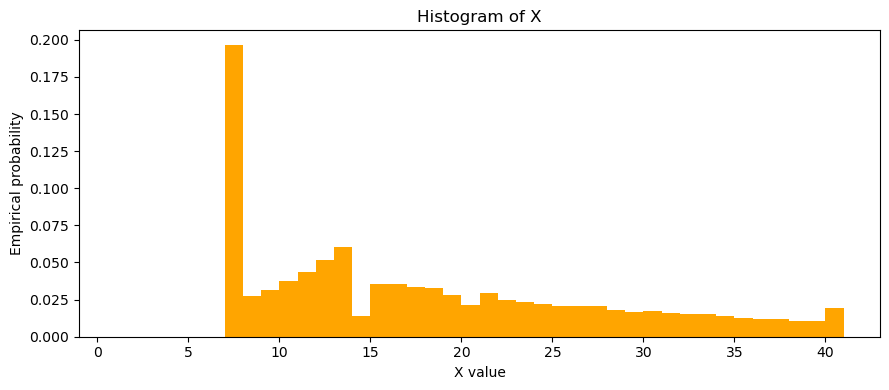

In [65]:
n_samples = 100_000
samples = simulate(n_samples)

counts = pd.Series(samples).value_counts().sort_index()
pmf = counts / counts.sum()

plt.figure(figsize=(9,4))
plt.hist(samples, bins=range(1, max_display+2), density=True, color='orange')
plt.xlabel("X value")
plt.ylabel("Empirical probability")
plt.title("Histogram of X")
plt.tight_layout()
plt.show()

The empirical distribution of X (plotted above), shows that the most probable value of X is 7. These means that most trials of X end quickly, within a few rolls, but some trials take longer which leads to the right skew and the tail at the right of the graph.